# Q2. Practice with PCA 

In [23]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('roles_life_cycle_mapping_wide.csv')

## 1. Setup and Load the Dataset. Do clean up if necessary

In [9]:
df_info = data.info()
df_head = data.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Job_Title                                  52 non-null     object
 1   Flag                                       52 non-null     int64 
 2   L1_Business opportunity                    52 non-null     int64 
 3   L2_Find data sources                       52 non-null     int64 
 4   L3_Explore and visualize data              52 non-null     int64 
 5   L4_Develop data (Clean Data)               52 non-null     int64 
 6   L5_Develop data (Feature-engineer)         52 non-null     int64 
 7   L6_Develop data (Collect additional data)  52 non-null     int64 
 8   L7_Train models                            52 non-null     int64 
 9   L8_Deploy best model                       52 non-null     int64 
 10  L9_Monitor and manage model usage       

(None,
                           Job_Title  Flag  L1_Business opportunity  \
 0               AI / ML Specialist      1                        2   
 1           AI Adoption Specialist      1                        3   
 2             AI Innovation Leader      1                        4   
 3      AI Risk & Ethics Specialist      1                        3   
 4  AI Test & Evaluation Specialist      1                        1   
 
    L2_Find data sources  L3_Explore and visualize data  \
 0                     3                              4   
 1                     1                              1   
 2                     1                              1   
 3                     2                              2   
 4                     1                              2   
 
    L4_Develop data (Clean Data)  L5_Develop data (Feature-engineer)  \
 0                             3                                   3   
 1                             1                                 

## 2. Data preprocessing - standardization to zero-mean 

In [33]:
df_numeric = df.drop(columns=['Job_Title'])

scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_numeric)

df_standardized_df = pd.DataFrame(df_standardized, columns=df_numeric.columns)

df_standardized_df.head()

,Flag,L1_Business opportunity,L2_Find data sources,L3_Explore and visualize data,L4_Develop data (Clean Data),L5_Develop data (Feature-engineer),L6_Develop data (Collect additional data),L7_Train models,L8_Deploy best model,L9_Monitor and manage model usage,L10_Measure success,L11_Retrain or retire model
0,1.930615,-0.616872,0.454257,0.963852,0.341972,0.668339,-0.362554,1.632993,1.484945,0.442181,0.251155,1.382189
1,1.930615,0.129113,-1.362770,-1.584637,-1.351605,-1.375992,-2.158061,0.000000,-0.107161,0.442181,0.938526,-0.863868
2,1.930615,0.875097,-1.362770,-1.584637,-2.198394,-1.375992,-1.260308,-0.816497,-0.903214,-0.299542,0.251155,-0.115182
3,1.930615,0.129113,-0.454257,-0.735141,-1.351605,-0.353827,-0.362554,-0.816497,-0.107161,-0.299542,-0.436216,-0.863868
4,1.930615,-1.362857,-1.362770,-0.735141,-1.351605,-0.353827,-0.362554,0.000000,1.484945,1.183904,0.938526,-0.115182


## 3. Perform PCA on the given dataset 

In [56]:
pca = PCA()
pca.fit(df_standardized)

explained_variance_ratio = pca.explained_variance_ratio_

## 4. Create a scree plot and decide on the number of principal components to retain; state the percentage of variance retained for the transformed dataset.

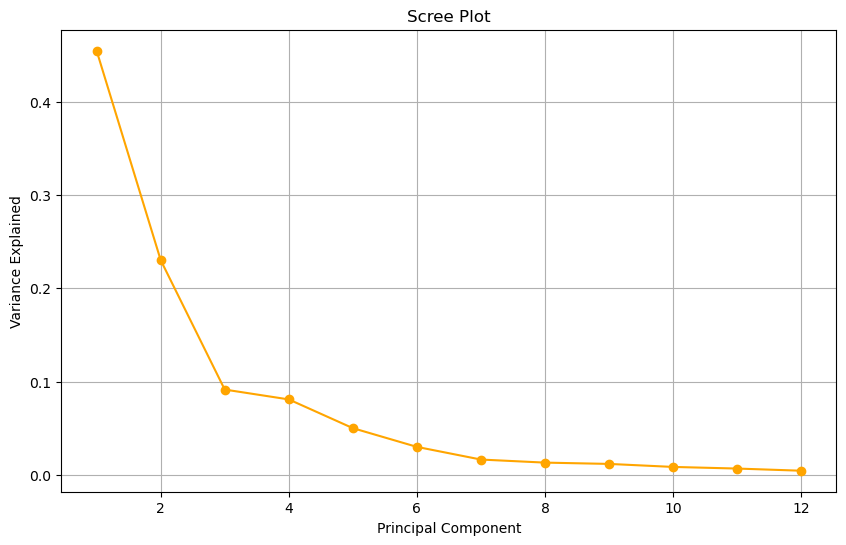

array([0.45463528, 0.68492771, 0.77650611, 0.85752964, 0.90776764,
       0.93793075, 0.95452404, 0.96783313, 0.97974612, 0.98843228,
       0.99537851, 1.        ])

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='orange')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.grid(True)
plt.show()

cumulative_variance_ratio = explained_variance_ratio.cumsum()
cumulative_variance_ratio

## 5. Output the transformed dataset

In [37]:
pca_5 = PCA(n_components=5)
df_transformed = pca_5.fit_transform(df_standardized)

df_transformed_df = pd.DataFrame(df_transformed, columns=[f"PC{i+1}" for i in range(5)])

df_transformed_df.head()

,PC1,PC2,PC3,PC4,PC5
0,2.308365,-0.931713,0.057042,2.292632,-0.373401
1,-2.034947,-2.803698,1.675399,1.155492,0.805882
2,-2.552441,-2.012644,2.687010,0.521291,0.164976
3,-1.638918,-0.438149,1.718712,1.365928,-0.127042
4,-0.221407,-2.673904,0.400004,2.103663,0.004738


## 6. Create a scatter plot of the first two principal components and interpret the result. 

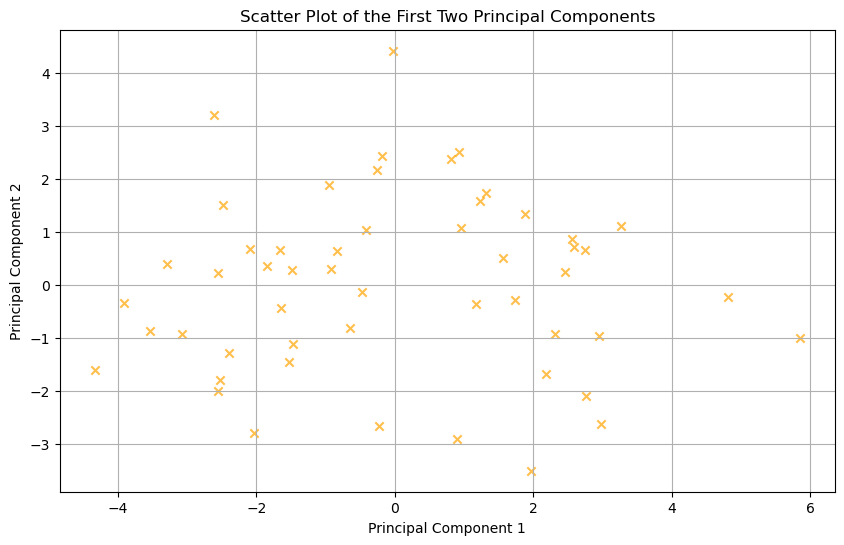

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(df_transformed_df['PC1'], df_transformed_df['PC2'], alpha=0.7, color='orange', marker='x')
plt.title("Scatter Plot of the First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# Q3. Feature selection

In [78]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor

In [66]:
bmi_data = pd.read_csv('BMI.csv')

bmi_data_info = bmi_data.info()
bmi_data_head = bmi_data.head()

bmi_data_info, bmi_data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      252 non-null    int64  
 1   Weight   252 non-null    float64
 2   Height   252 non-null    float64
 3   Neck     252 non-null    float64
 4   Chest    252 non-null    float64
 5   Abdomen  252 non-null    float64
 6   Hip      252 non-null    float64
 7   Thigh    252 non-null    float64
 8   Knee     252 non-null    float64
 9   Ankle    252 non-null    float64
 10  Biceps   252 non-null    float64
 11  Forearm  252 non-null    float64
 12  Wrist    252 non-null    float64
 13  fatpctg  252 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 27.7 KB


(None,
    Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  Ankle  \
 0   22   160.8    62.4  34.0   95.8     87.9   99.2   59.6  38.9   24.0   
 1   22   170.6    80.5  38.5   93.6     83.0   98.7   58.7  37.3   23.4   
 2   23   153.9    69.3  36.2   93.1     85.2   94.5   59.0  37.3   21.9   
 3   23   157.1    70.4  35.5   92.1     77.1   93.9   56.1  36.1   22.7   
 4   23   196.5    88.6  38.0   96.6     85.3  102.5   59.1  37.6   23.2   
 
    Biceps  Forearm  Wrist  fatpctg  
 0    28.8     25.2   16.6     25.3  
 1    30.5     28.9   18.2      6.1  
 2    32.0     27.4   17.1     12.3  
 3    30.5     27.2   18.2      9.4  
 4    31.8     29.7   18.3     10.3  )

## Goal: predict fat percentage (fatpctg) using all other features available in the data (all but age). Conduct feature selection using one method from each of the category:

In [76]:
X = bmi_data.drop(columns=['Age', 'fatpctg'])
y = bmi_data['fatpctg']

## 1. Wrapper Method (RFE):

In [113]:
rfe_selector = RFE(estimator=RandomForestRegressor(), n_features_to_select=5, step=1)
rfe_selector.fit(X, y)
rfe_top_features = X.columns[rfe_selector.support_].tolist()

model_rfe = LinearRegression()
model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test_rfe)

print(rfe_top_features)

['Weight', 'Height', 'Abdomen', 'Knee', 'Wrist']


## 2. Embedded Method (Lasso):

In [125]:
lasso_selector = Lasso(alpha=0.1).fit(X, y)
lasso_top_features = X.columns[(lasso_selector.coef_ != 0)].tolist()

model_lasso = LinearRegression()
model_lasso.fit(X_train_lasso, y_train)
y_pred_lasso = model_lasso.predict(X_test_lasso)

print(lasso_top_features)

['Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Ankle', 'Biceps', 'Forearm', 'Wrist']


## 3. Filter Method (Correlation-based):

In [117]:
correlation_selector = SelectKBest(score_func=f_regression, k=5)
correlation_selector.fit(X, y)
correlation_top_features = X.columns[correlation_selector.get_support()].tolist()

model_corr = LinearRegression()
model_corr.fit(X_train_corr, y_train)
y_pred_corr = model_corr.predict(X_test_corr)

print(correlation_top_features)

['Weight', 'Chest', 'Abdomen', 'Hip', 'Thigh']


In [121]:
predictions_df = pd.DataFrame({
    "Actual fatpctg": y_test.values,
    "RFE Predictions": y_pred_rfe,
    "Lasso Predictions": y_pred_lasso,
    "Correlation-Based Predictions": y_pred_corr
})

predictions_df

,Actual fatpctg,RFE Predictions,Lasso Predictions,Correlation-Based Predictions
0,22.3,18.328124,16.228111,18.533793
1,14.2,12.011323,13.524474,11.782440
2,15.9,18.122425,18.173561,18.976053
3,19.5,15.309384,13.901702,14.861811
4,22.1,16.119187,15.704363,16.245748
5,27.9,22.014776,21.107233,21.420926
6,13.8,16.167709,15.446377,16.856106
7,30.4,28.983621,28.070625,27.043126
8,19.2,22.364706,23.608515,22.589640
9,10.0,16.997016,15.888724,16.830325
